In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import models, layers
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

train_path = '/content/train_v2.csv'
data_loan_train = pd.read_csv(train_path)
test_path='/content/test_v2.csv'
data_loan_test=pd.read_csv(test_path)



<ipython-input-32-8de7b1c391cf>:28: DtypeWarning: Columns (417,462,525) have mixed types. Specify dtype option on import or set low_memory=False.
  data_loan_test=pd.read_csv(test_path)


In [ ]:
data_loan_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5.0,2.14,-1.54,1.18,0.1833,0.7873,1.0,0.0,5.0,0.0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6.0,0.54,-0.24,0.13,0.1926,-0.6787,1.0,0.0,5.0,0.0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13.0,2.89,-1.73,1.04,0.2521,0.7258,1.0,0.0,5.0,0.0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4.0,1.29,-0.89,0.66,0.2498,0.7119,1.0,0.0,5.0,0.0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26.0,6.11,-3.82,2.51,0.2282,-0.5399,0.0,0.0,5.0,0.0


In [ ]:
data_loan_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,-8.71,19.0,3.30,-9.37,0.50,0.0539,-1.0733,0.0,1.0,1079.0
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,-13.26,24.0,9.53,-7.55,6.22,0.3030,0.6087,0.0,1.0,36.0
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,-4.99,9.0,3.25,-2.33,1.69,0.2317,0.4184,0.0,0.0,393.0
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,-16.83,11.0,0.26,-5.31,0.78,0.2826,-0.7711,0.0,0.0,394.0
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,-20.00,10.0,13.55,-0.61,0.01,0.1815,-1.0843,0.0,0.0,23.0


In [ ]:
data_loan_train.isnull().sum()

id       0
f1       0
f2       0
f3       0
f4       0
        ..
f775    45
f776     1
f777     1
f778     1
loss     1
Length: 771, dtype: int64

In [ ]:
data_loan_test.isnull().sum()

id       0
f1       0
f2       0
f3       0
f4       0
        ..
f774    32
f775    56
f776     1
f777     1
f778     1
Length: 770, dtype: int64

In [ ]:
data_loan_tr=data_loan_train.dropna()
data_loan_te=data_loan_test.dropna()

In [ ]:
data_loan_tr.isnull().sum()

id      0
f1      0
f2      0
f3      0
f4      0
       ..
f775    0
f776    0
f777    0
f778    0
loss    0
Length: 771, dtype: int64

In [ ]:
data_loan_te.isnull().sum()

id      0
f1      0
f2      0
f3      0
f4      0
       ..
f774    0
f775    0
f776    0
f777    0
f778    0
Length: 770, dtype: int64

Text(0.5, 1.0, 'Histogram Showing Loss Distribution')

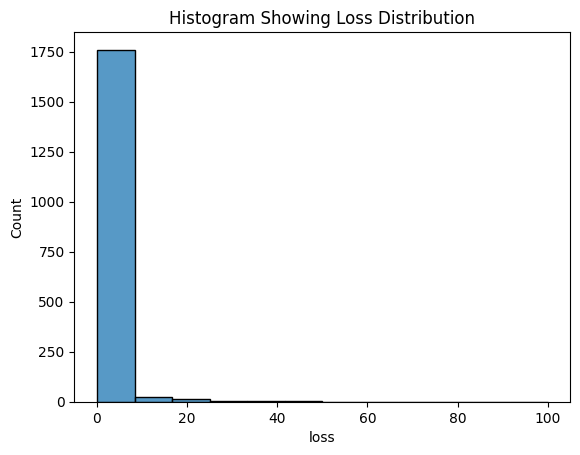

In [ ]:
sns.histplot(data_loan_tr['loss'])
plt.title('Histogram Showing Loss Distribution')

In [ ]:
number = data_loan_tr.f777.value_counts()
legal = number[0]
fraud = number[1]
legal_perc = (legal/(legal+fraud))*100
fraud_perc = (fraud/(legal+fraud))*100
print("There were {} legal transactions ({:.2f}%) and {} fraud transactions ({:.2f}%).".format(legal, legal_perc, fraud, fraud_perc))

There were 1412 legal transactions (78.14%) and 395 fraud transactions (21.86%).


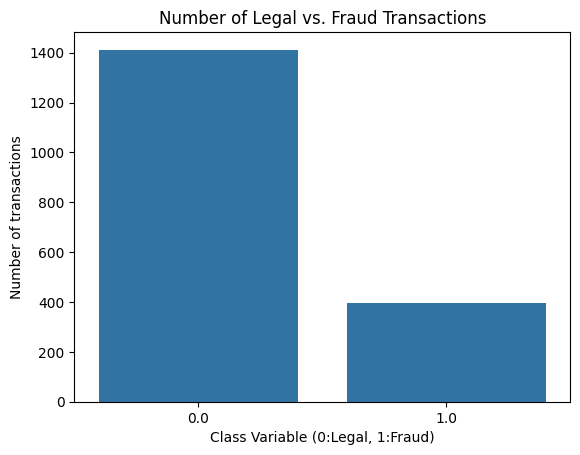

In [ ]:
sns.barplot(x=number.index, y=number)
plt.title("Number of Legal vs. Fraud Transactions")
plt.ylabel("Number of transactions")
plt.xlabel("Class Variable (0:Legal, 1:Fraud)")
plt.show()

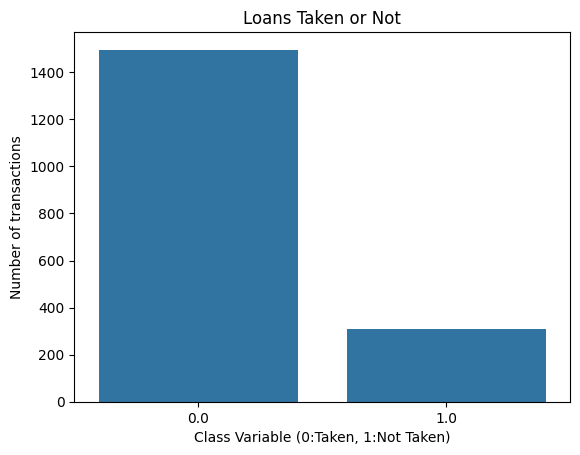

In [ ]:
number_loan = data_loan_tr.f776.value_counts()
sns.barplot(x=number_loan.index, y=number_loan)
plt.title("Loans Taken or Not")
plt.ylabel("Number of transactions")
plt.xlabel("Class Variable (0:Taken, 1:Not Taken)")
plt.show()

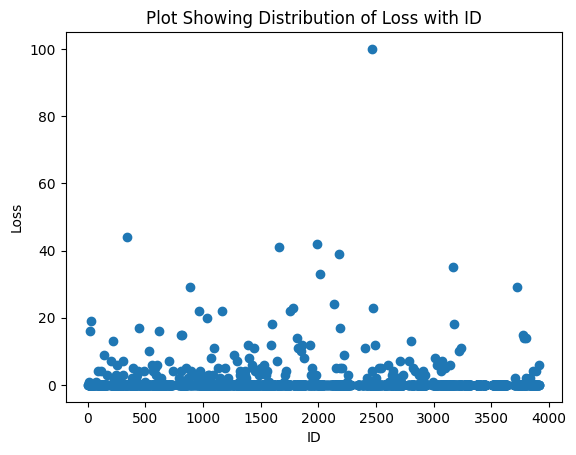

In [ ]:
plt.scatter(data_loan_tr['id'], data_loan_tr['loss'])
plt.xlabel('ID')
plt.ylabel('Loss')
plt.title('Plot Showing Distribution of Loss with ID')
plt.show()

In [ ]:
print("Train Number: " + str(data_loan_tr.shape) + " \nTest Number: " + str(data_loan_te.shape))
data_loan_tr.reset_index(drop=True, inplace=True)
data_loan_te.reset_index(drop=True, inplace=True)

Train Number: (1807, 771) 
Test Number: (1017, 770)


In [ ]:
fraud_in_train = data_loan_tr.f777.value_counts()[1]
print("There are " + str(fraud_in_train) + " fraud transactions in train data.")


There are 395 fraud transactions in train data.


In [ ]:
df = data_loan_train.copy()
df.replace("NA",np.NaN)
df.fillna(df.mean(), inplace = True)
df = df.dropna()
df["loss"] = df["loss"].apply(lambda x: 0 if x== 0 else 1)

<ipython-input-47-dff69a285c1b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)
<ipython-input-47-dff69a285c1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loss"] = df["loss"].apply(lambda x: 0 if x== 0 else 1)


In [ ]:
data_loan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Columns: 771 entries, id to loss
dtypes: float64(743), int64(10), object(18)
memory usage: 10.6+ MB


In [ ]:
data_loan_te.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,107379.911504,134.012783,8.101278,0.487795,2546.607670,8.049164,51679.758112,3388.800393,2929.000983,133.964533,...,-12.412016,24.020649,8.255910,-6.073795,4.674995,0.258732,0.208885,0.167158,0.278269,229.685349
std,1128.194353,14.065819,1.733348,0.288031,1370.129454,5.514257,35504.420071,2967.250225,2734.468404,13.195461,...,10.795186,21.023294,7.151667,5.246605,4.043229,0.048291,0.702922,0.373301,0.448367,338.217207
min,105474.000000,109.000000,1.000000,0.000859,1100.000000,1.000000,78.000000,14.000000,5.000000,114.040000,...,-89.110000,3.000000,0.510000,-42.500000,0.090000,0.047400,-4.152800,0.000000,0.000000,2.000000
25%,106401.000000,124.000000,7.000000,0.232771,1500.000000,4.000000,12290.000000,671.000000,895.000000,124.770000,...,-16.390000,10.000000,3.260000,-7.940000,1.780000,0.237000,-0.482700,0.000000,0.000000,19.000000
50%,107414.000000,130.000000,8.000000,0.490681,1900.000000,4.000000,76957.000000,2567.000000,2119.000000,128.520000,...,-8.940000,17.000000,6.010000,-4.450000,3.470000,0.265100,0.515400,0.000000,0.000000,46.000000
75%,108385.000000,144.000000,9.000000,0.734924,3600.000000,16.000000,81409.000000,5665.000000,3981.000000,146.190000,...,-5.110000,31.000000,10.970000,-2.380000,6.180000,0.288500,0.748400,0.000000,1.000000,393.000000
max,109346.000000,166.000000,11.000000,0.998969,6400.000000,17.000000,88023.000000,11314.000000,13193.000000,165.210000,...,-0.800000,161.000000,59.130000,-0.220000,31.830000,0.418300,1.955200,1.000000,1.000000,1212.000000


In [ ]:
data_loan_tr.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,...,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,1882.076923,131.039292,8.338683,0.509722,2433.480908,5.021583,45808.157720,2876.040952,2363.918650,130.985075,...,24.056447,8.200183,-6.030006,4.663403,0.260155,0.168419,0.172108,0.218594,86.184837,0.769231
std,1134.580195,13.728345,1.420216,0.289914,1298.415510,3.386194,35889.473376,2366.898257,2104.232058,12.569037,...,21.814788,7.617038,5.640772,4.400335,0.048603,0.708204,0.377579,0.413407,196.508463,4.136699
min,3.000000,107.000000,2.000000,0.000901,1100.000000,2.000000,44.000000,8.000000,9.000000,112.570000,...,3.000000,0.440000,-43.160000,0.080000,0.049400,-2.514000,0.000000,0.000000,3.000000,0.000000
25%,974.500000,122.000000,8.000000,0.251978,1500.000000,3.000000,9836.000000,773.000000,797.500000,122.810000,...,9.000000,2.940000,-8.130000,1.630000,0.236000,-0.545050,0.000000,0.000000,15.000000,0.000000
50%,1783.000000,127.000000,9.000000,0.519699,1900.000000,4.000000,75506.000000,2484.000000,1781.000000,126.300000,...,16.000000,5.500000,-4.040000,3.110000,0.265500,0.501900,0.000000,0.000000,30.000000,0.000000
75%,2875.500000,135.000000,9.000000,0.763821,3100.000000,4.000000,79631.000000,4574.000000,3270.500000,132.495000,...,31.500000,11.040000,-2.140000,6.305000,0.290600,0.732150,0.000000,0.000000,80.000000,0.000000
max,3915.000000,173.000000,10.000000,0.999890,6600.000000,16.000000,86789.000000,8297.000000,9568.000000,168.790000,...,167.000000,57.410000,-0.200000,34.040000,0.388800,2.682600,1.000000,1.000000,1083.000000,100.000000


In [ ]:
fd=data_loan_tr['f777'].value_counts()
fd

0.0    1412
1.0     395
Name: f777, dtype: int64

In [ ]:
df = pd.concat([data_loan_te, data_loan_tr])

In [ ]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,9.0,3.25,-2.33,1.69,0.2317,0.4184,0.0,0.0,393.0,NaN
1,105481,153,7,0.445673,5300,10.0,83293,4121.0,455.0,154.38,...,34.0,12.15,-8.58,6.26,0.2476,0.8338,0.0,1.0,34.0,NaN
2,105484,127,8,0.870942,1300,4.0,84020,4606.0,9204.0,125.60,...,17.0,4.61,-3.20,2.43,0.2610,-0.6390,0.0,0.0,30.0,NaN
3,105487,125,10,0.153149,1300,16.0,84882,1715.0,2377.0,126.12,...,22.0,7.94,-5.73,4.21,0.2846,0.8886,0.0,0.0,393.0,NaN
4,105490,112,10,0.044429,1900,16.0,76878,479.0,6496.0,117.08,...,13.0,4.26,-3.15,2.44,0.3035,0.6035,1.0,0.0,513.0,NaN


In [ ]:
data=df.dropna()
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,3,126,10,0.500080,1100,3.0,83607,1800.0,1527.0,127.76,...,13.0,2.89,-1.73,1.04,0.2521,0.7258,1.0,0.0,5.0,0.0
1,5,109,9,0.502749,2900,4.0,79124,89.0,491.0,122.72,...,26.0,6.11,-3.82,2.51,0.2282,-0.5399,0.0,0.0,5.0,0.0
2,7,121,9,0.985674,2900,4.0,13026,4565.0,263.0,126.36,...,23.0,7.06,-4.99,3.77,0.2458,-0.6732,0.0,0.0,5.0,0.0
3,8,128,9,0.385778,2900,4.0,79244,6597.0,3592.0,127.19,...,17.0,4.45,-3.26,2.56,0.2947,-0.7220,0.0,0.0,5.0,1.0
4,9,126,9,0.745471,2900,4.0,78920,3058.0,112.0,123.89,...,7.0,2.02,-1.35,0.95,0.2601,0.7132,0.0,0.0,5.0,0.0


In [ ]:
def prep_data(df: pd.DataFrame) -> tuple[np.ndarray, np.ndarray]:
    X = df.iloc[:, 2:30].values
    y = df['f777'].values
    return X, y


In [ ]:
X, y = prep_data(data)

In [ ]:

X, y = prep_data(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=28)
principalComponents_train = pca.fit_transform(X_train_scaled)
principalComponents_test = pca.transform(X_test_scaled)

cumsum = np.cumsum(pca.explained_variance_ratio_)



Text(0, 0.5, 'Cumulative Variance Explained')

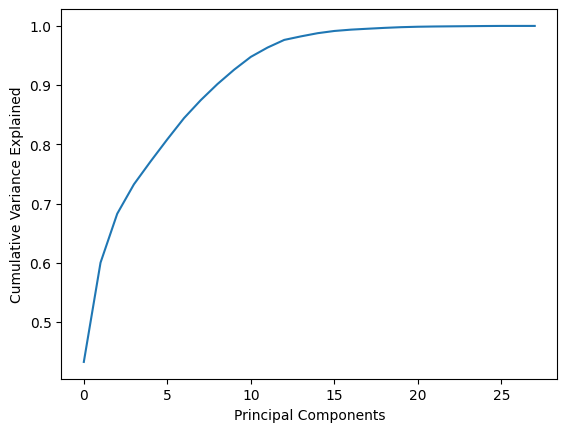

In [ ]:
plt.plot(cumsum)
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Explained")


In [ ]:
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)


print(d)


12


In [ ]:
pca = PCA(n_components=28)
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_test)

In [ ]:

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
r2_score(y_test, y_predicted)


0.967390665163182

In [ ]:

model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
predicted = model_log.predict(X_test)
r2_score(y_test, predicted)


0.8667648141332351

In [ ]:

model_rfc=RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train, y_train)
predicted = model_rfc.predict(X_test)
r2_score(y_test, predicted)

0.9666912035333088

In [ ]:
model_rfc.fit(principalComponents_train,y_train)
round(model_rfc.score(principalComponents_train,y_train))

1

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
predicted_gnb = model_gnb.predict(X_test)
r2_gnb = r2_score(y_test, predicted_gnb)
print(f"Gaussian Naive Bayes R^2: {r2_gnb}")

Gaussian Naive Bayes R^2: 0.5669856459330143


In [ ]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)
predicted_xgb = model_xgb.predict(X_test)
r2_xgb = r2_score(y_test, predicted_xgb)
print(f"XGBoost R^2: {r2_xgb}")

XGBoost R^2: 0.9833456017666544


##Logistical Regression




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=28)
principalComponents_train = pca.fit_transform(X_train)



In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
train_accuracy = logreg.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
class_report = classification_report(y_train, y_train_pred, digits=3)
print("Classification Report on Training Set:\n", class_report)


Training Accuracy: 96.47%
Classification Report on Training Set:
               precision    recall  f1-score   support

         0.0      0.995     0.959     0.977      1121
         1.0      0.874     0.985     0.926       324

    accuracy                          0.965      1445
   macro avg      0.935     0.972     0.951      1445
weighted avg      0.968     0.965     0.965      1445



In [ ]:

y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
con_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", con_matrix)
class_report = classification_report(y_test, y_test_pred, digits=3)
print("Classification Report:\n", class_report)


Test Accuracy: 97.79%
Confusion Matrix:
 [[284   7]
 [  1  70]]
Classification Report:
               precision    recall  f1-score   support

         0.0      0.996     0.976     0.986       291
         1.0      0.909     0.986     0.946        71

    accuracy                          0.978       362
   macro avg      0.953     0.981     0.966       362
weighted avg      0.979     0.978     0.978       362



##Linear Regression

In [ ]:

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 0.08
R-squared (R²): 0.97


In [ ]:
y_test_pred = linear_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Test R-squared (R²): {r2_test:.2f}")


Test Mean Squared Error (MSE): 0.00
Test Mean Absolute Error (MAE): 0.04
Test Root Mean Squared Error (RMSE): 0.06
Test R-squared (R²): 0.97


##RandomForest

In [ ]:
random_forest=RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(X_train,y_train)
y_predictions=random_forest.predict(X_train)
random_forest.score(X_train,y_train)
acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)
print(acc_random_forest)
con=confusion_matrix(y_train,y_predictions)
print(con)
print(classification_report(y_train,y_predictions,digits=3))


100.0
[[1121    0]
 [   0  324]]
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000      1121
         1.0      1.000     1.000     1.000       324

    accuracy                          1.000      1445
   macro avg      1.000     1.000     1.000      1445
weighted avg      1.000     1.000     1.000      1445



In [ ]:
y_test_pred = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
con_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", con_matrix)
class_report = classification_report(y_test, y_test_pred, digits=3)
print("Classification Report:\n", class_report)


Test Accuracy: 100.00%
Confusion Matrix:
 [[291   0]
 [  0  71]]
Classification Report:
               precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       291
         1.0      1.000     1.000     1.000        71

    accuracy                          1.000       362
   macro avg      1.000     1.000     1.000       362
weighted avg      1.000     1.000     1.000       362



##Gaussian

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_train_pred = gaussian_nb.predict(X_train)
train_accuracy_nb = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy_nb * 100:.2f}%")
con_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix on Training Set:\n", con_matrix_train)
class_report_train = classification_report(y_train, y_train_pred, digits=3)
print("Classification Report on Training Set:\n", class_report_train)


Training Accuracy: 93.63%
Confusion Matrix on Training Set:
 [[1083   38]
 [  54  270]]
Classification Report on Training Set:
               precision    recall  f1-score   support

         0.0      0.953     0.966     0.959      1121
         1.0      0.877     0.833     0.854       324

    accuracy                          0.936      1445
   macro avg      0.915     0.900     0.907      1445
weighted avg      0.935     0.936     0.936      1445



In [ ]:
y_test_pred = gaussian_nb.predict(X_test)
test_accuracy_nb = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy_nb * 100:.2f}%")
con_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on Test Set:\n", con_matrix_test)
class_report_test = classification_report(y_test, y_test_pred, digits=3)
print("Classification Report on Test Set:\n", class_report_test)


Test Accuracy: 94.20%
Confusion Matrix on Test Set:
 [[284   7]
 [ 14  57]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0      0.953     0.976     0.964       291
         1.0      0.891     0.803     0.844        71

    accuracy                          0.942       362
   macro avg      0.922     0.889     0.904       362
weighted avg      0.941     0.942     0.941       362



##XGBOOST

In [ ]:

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_clf.fit(X_train, y_train)
y_train_pred_xgb = xgb_clf.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f"Training Accuracy: {train_accuracy_xgb * 100:.2f}%")
con_matrix_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
print("Confusion Matrix on Training Set:\n", con_matrix_train_xgb)
class_report_train_xgb = classification_report(y_train, y_train_pred_xgb, digits=3)
print("Classification Report on Training Set:\n", class_report_train_xgb)


Training Accuracy: 100.00%
Confusion Matrix on Training Set:
 [[1121    0]
 [   0  324]]
Classification Report on Training Set:
               precision    recall  f1-score   support

         0.0      1.000     1.000     1.000      1121
         1.0      1.000     1.000     1.000       324

    accuracy                          1.000      1445
   macro avg      1.000     1.000     1.000      1445
weighted avg      1.000     1.000     1.000      1445



In [ ]:
y_test_pred_xgb = xgb_clf.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Test Accuracy: {test_accuracy_xgb * 100:.2f}%")
con_matrix_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print("Confusion Matrix on Test Set:\n", con_matrix_test_xgb)
class_report_test_xgb = classification_report(y_test, y_test_pred_xgb, digits=3)
print("Classification Report on Test Set:\n", class_report_test_xgb)


Test Accuracy: 100.00%
Confusion Matrix on Test Set:
 [[291   0]
 [  0  71]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       291
         1.0      1.000     1.000     1.000        71

    accuracy                          1.000       362
   macro avg      1.000     1.000     1.000       362
weighted avg      1.000     1.000     1.000       362



In [ ]:

models = {"Logistic Regression": LogisticRegression(max_iter = 200),
        "Random Forest": RandomForestClassifier(),
        "Gaussian NB":GaussianNB(),
        'XGBoost': XGBClassifier()
}

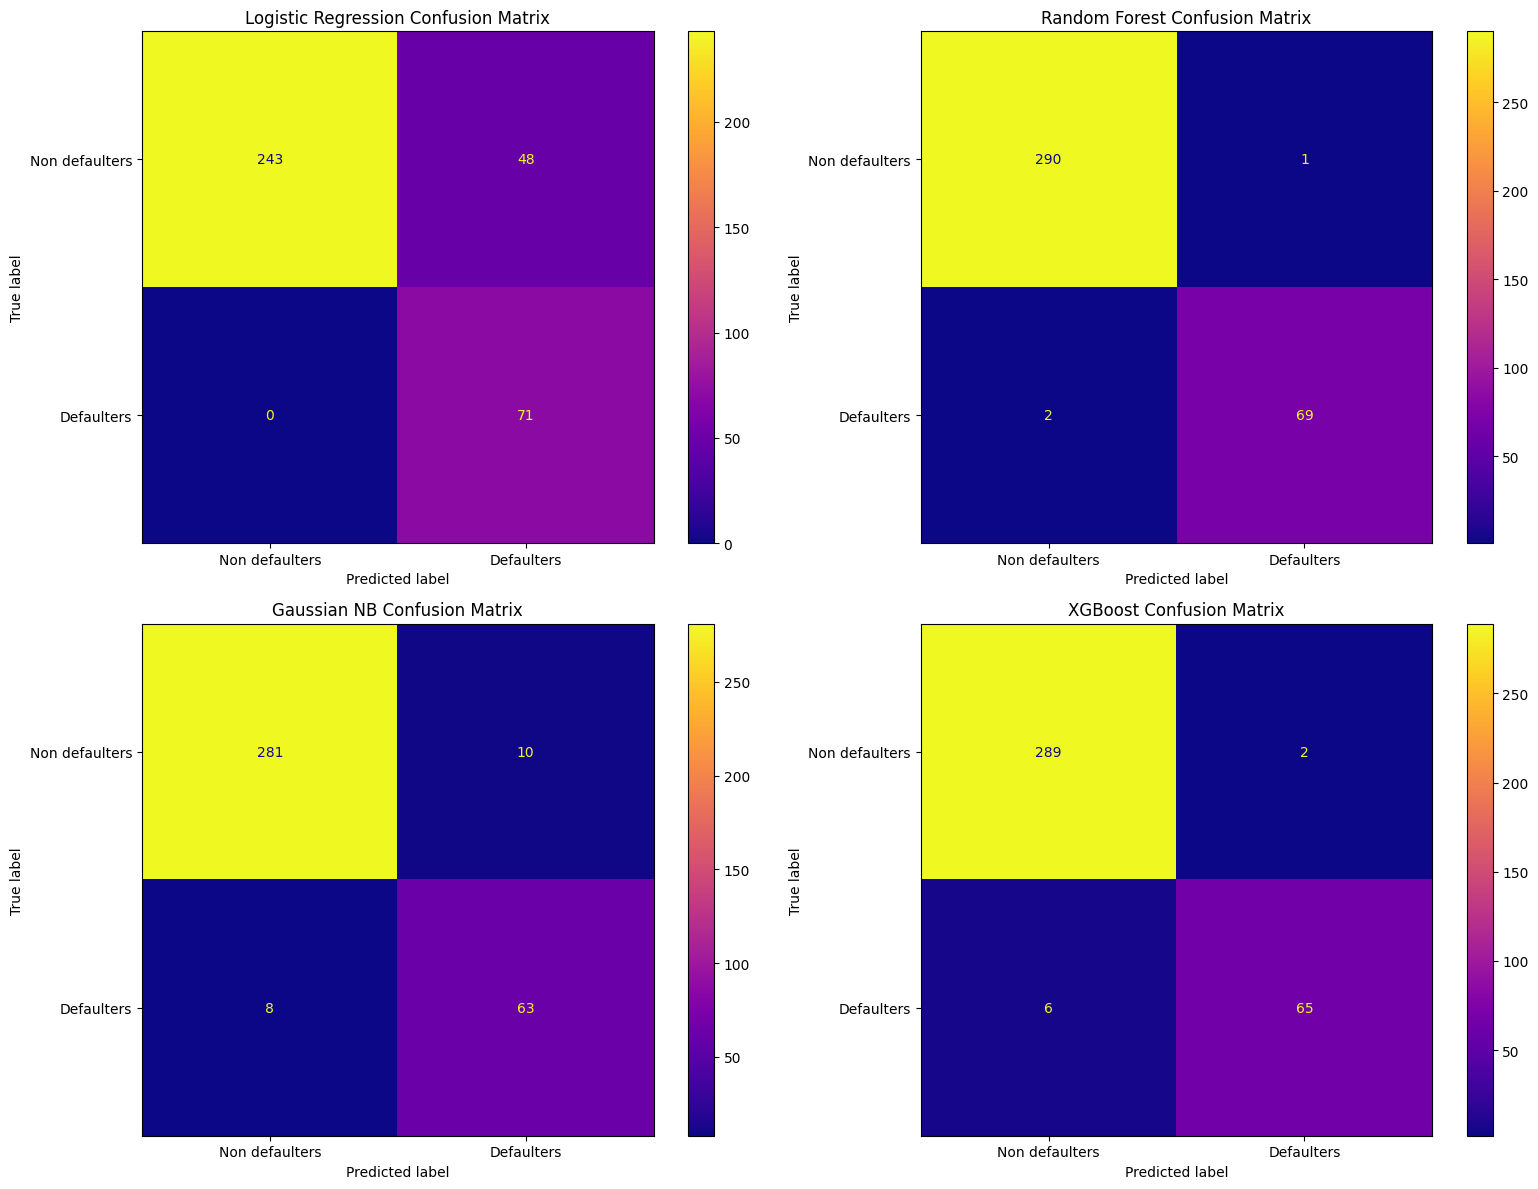

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for cnt, (name, model) in enumerate(models.items()):
    model.fit(principalComponents_train, y_train)
    model_pred = model.predict(principalComponents_test)

    conf_m = confusion_matrix(y_test, model_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=['Non defaulters', 'Defaulters'])
    display.plot(ax=axes[cnt], colorbar=True, cmap="plasma")
    axes[cnt].set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()


In [ ]:
param_grid_rfc = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],

}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5)

grid_search_rfc.fit(principalComponents_train, y_train)
best_model_rfc = grid_search_rfc.best_estimator_
rfc_pred = best_model_rfc.predict(principalComponents_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print(f"New accuracy for Random Forest after grid search: {rfc_accuracy}")


New accuracy for Random Forest after grid search: 0.994475138121547


In [ ]:
param_grid_log_reg = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=200), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(principalComponents_train, y_train)


best_model_log_reg = grid_search_log_reg.best_estimator_
log_reg_pred = best_model_log_reg.predict(principalComponents_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(f"New accuracy for Logistic Regression after grid search: {log_reg_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

New accuracy for Logistic Regression after grid search: 0.9447513812154696


In [ ]:

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],

}

grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, verbose=1, n_jobs=-1)

grid_search_xgb.fit(principalComponents_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_

best_model_xgb = grid_search_xgb.best_estimator_
xgb_pred = best_model_xgb.predict(principalComponents_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"New accuracy for XGBoost after grid search: {xgb_accuracy}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
New accuracy for XGBoost after grid search: 0.9696132596685083


In [ ]:

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)

grid_search_nb.fit(principalComponents_train, y_train)
best_model_nb = grid_search_nb.best_estimator_
best_model_nb = grid_search_nb.best_estimator_
nb_pred = best_model_nb.predict(principalComponents_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"New accuracy for Gaussian NB after grid search: {nb_accuracy}")


New accuracy for Gaussian NB after grid search: 0.9502762430939227
